In [1]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run cell',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.restart_run_all();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [2]:
import silq
silq.initialize("EWJN")

qc.show_subprocess_widget()
%matplotlib nbagg

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing instruments
Initializing parameters
Initializing data
Initializing analysis
Initializing plotting
Initialization complete


In [3]:
ELR_parameter.setup(return_traces=True, samples=10)

In [4]:
result = ELR_parameter()

<IPython.core.display.Javascript object>


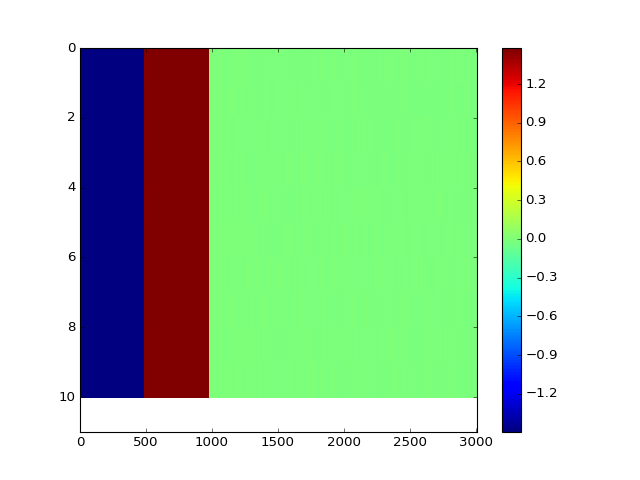

<IPython.core.display.Javascript object>


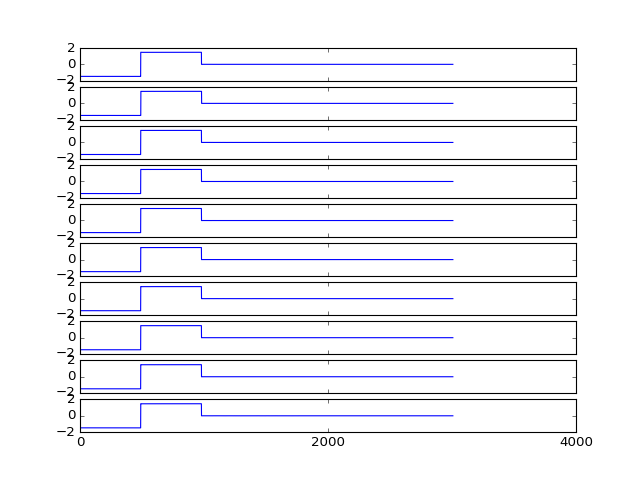

In [5]:
plot_traces(traces=result[-1])#(result[-1]-2**15)/2**15 * 2)#, traces_AWG=result[-1])